In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Зчитування даних з файлу
data = pd.read_csv('GlobalWeather_EDA_data.csv', encoding="latin1", delimiter=",");

# Видалення зайвої ознаки
data = data.drop(columns="Unnamed: 0")

In [2]:
X = data.drop('country', axis=1)  # Ознаки, крім 'country'
Y = data['country']  # Вихідна змінна 'country'

# Перевірка розмірності X та Y
# Вибираємо лише числові ознаки
X = data.select_dtypes(include='float64')

In [3]:
# Розбиття dataset на тренувальні та тестові дані за допомогою train_test_split, який ми імпортували
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [4]:
# Будуємо та тренуємо модель SVM
from sklearn.svm import SVC
# Будуємо та тренуємо модель SVM з поліноміальним ядром
clf = SVC(kernel='poly', degree=3, gamma='auto', coef0=1)  # Adjust degree and coef0 as needed
clf.fit(X_train, y_train)

SVC(coef0=1, gamma='auto', kernel='poly')

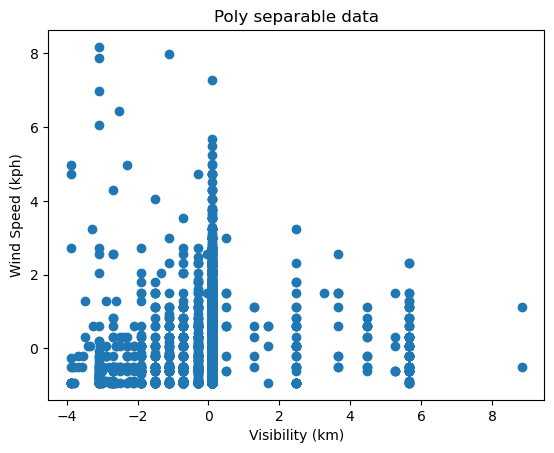

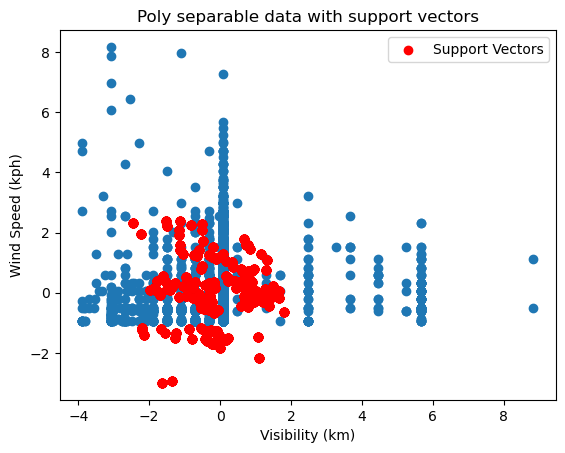

In [5]:
# Generate scatter plot for training data
plt.scatter(X_train['visibility_km'], X_train['wind_kph'])
plt.title('Poly separable data')
plt.xlabel('Visibility (km)')
plt.ylabel('Wind Speed (kph)')
plt.show()

# Get support vectors themselves
support_vectors = clf.support_vectors_

# Visualize support vectors
plt.scatter(X_train['visibility_km'], X_train['wind_kph'])
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], color='red', marker='o', label='Support Vectors')
plt.title('Poly separable data with support vectors')
plt.xlabel('Visibility (km)')
plt.ylabel('Wind Speed (kph)')
plt.legend()
plt.show()

In [6]:
# Прогнозування на тестових даних
y_pred = clf.predict(X_test)

# Оцінка точності моделі
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
#print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7226074895977809


In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score

import seaborn as sns
# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=data['country'].unique(),
            yticklabels=data['country'].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


KeyboardInterrupt



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score

# Параметри моделі SVM
C_values = [0.1, 1, 10]
kernel = 'linear'
best_accuracy = 0.0  # Initialize the best accuracy

# Ініціалізація та тренування моделі для кожного значення C
for C in C_values:
    clf = SVC(kernel=kernel, C=C, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for C={C}: {accuracy}")

    # Check if this C gives a better accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_C = C

# Оцінка параметрів оптимальної моделі
print("Parameters of the best model:")
print("Kernel:", kernel)
print("Best C:", best_C)
print("Best Accuracy:", best_accuracy)

# Train the best model
best_clf = SVC(kernel=kernel, C=best_C, random_state=42)
best_clf.fit(X_train, y_train)
y_pred_best = best_clf.predict(X_test)

# Print classification report for the best model
print("Classification Report for the best model:\n", classification_report(y_test, y_pred_best))
